In [25]:
# Dependencies
import json
import tweepy 
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Twitter API Keys
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [17]:
# Target Search Term
target_terms = ("@BBC", "@CBS", "@CNN","@Fox", "@NewYorkTimes")

In [18]:
# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

In [34]:
# Array to hold sentiment
sentiment_array = []

# Variable for holding the oldest tweet
oldest_tweet = ""

# Loop through all target users
for target in target_terms:
     # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweet_times = []
    targetTerms_list = []

    # Loop through 10 times (total of 1500 tweets)
    for x in range(10):

        # Run search around each tweet
        public_tweets = api.search(target, count=100, result_type="recent")

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers and
                tweet["user"]["statuses_count"] > min_tweets and
                tweet["user"]["statuses_count"] < max_tweets and
                tweet["user"]["friends_count"] < max_following and
                    tweet["user"]["lang"] == lang):

                # Run Vader Analysis on each tweet
                compound = analyzer.polarity_scores(tweet["text"])["compound"]
                pos = analyzer.polarity_scores(tweet["text"])["pos"]
                neu = analyzer.polarity_scores(tweet["text"])["neu"]
                neg = analyzer.polarity_scores(tweet["text"])["neg"]

                # Add each value to the appropriate array
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                tweet_times.append(tweet["created_at"])
                targetTerms_list.append(target)
                
len(tweet_times)



230

In [29]:
# Convert all tweet times into datetime objects
tweet_time_objects = []

# Add each datetime object into the array
for x in range(len(tweet_times)):
    tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
    tweet_time_objects.append(tweet_datetime)

    # Preview that datetimes are matching
    #print(tweet_times[x])
    #print(tweet_datetime)

In [30]:
# Calculate the time between tweets
time_in_between = []

# Calculate the time in between each tweet
for x in range(len(tweet_time_objects)-1):
    hrs_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) / 3600
    time_in_between.append(hrs_apart)

# Hours Between Tweets
print("Avg. Hours Between Tweets: %s" % np.mean(time_in_between))


Avg. Hours Between Tweets: 5.23667515769


In [55]:
tweet_summary = pd.DataFrame({ "Tweet Polarity": compound_list,
                            "Media Source" : targetTerms_list,
                            "Tweet Times" : tweet_time_objects 
                             })

tweet_summary



,Media Source,Tweet Polarity,Tweet Times
0,@NewYorkTimes,0.0000,2017-12-27 16:47:08+00:00
1,@NewYorkTimes,0.0000,2017-12-27 15:54:15+00:00
2,@NewYorkTimes,0.0000,2017-12-27 07:24:44+00:00
3,@NewYorkTimes,0.7430,2017-12-26 02:53:11+00:00
4,@NewYorkTimes,0.0000,2017-12-25 16:39:07+00:00
5,@NewYorkTimes,-0.6917,2017-12-24 14:15:41+00:00
6,@NewYorkTimes,0.0000,2017-12-24 12:51:07+00:00
7,@NewYorkTimes,0.0000,2017-12-23 22:00:15+00:00
8,@NewYorkTimes,0.5983,2017-12-23 16:15:35+00:00
9,@NewYorkTimes,0.0000,2017-12-23 16:01:29+00:00


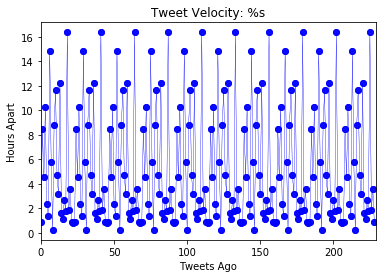

In [23]:
# Plot Time Between Tweets
plt.plot(range(len(time_in_between)), time_in_between, marker="o", 
               linewidth=0.25, alpha=0.8, color="b")
plt.xlim([0, len(time_in_between)])
plt.ylabel("Hours Apart")
plt.xlabel("Tweets Ago")
plt.title("Tweet Velocity: %s")
plt.show()

In [53]:
plt.figure(figsize=(20,10))

   
x = tweet_summary["Tweet Times"][tweet_summary["Media Source"]  == "@NewYorkTimes" ]
y = tweet_summary["Tweet Times"][tweet_summary["Media Source"]  == "@NewYorkTimes" ]
    
plt.scatter(x,y, marker="o", c='lightcoral', edgecolors="black")

plt.show()

ValueError: ordinal must be >= 1

ValueError: ordinal must be >= 1

ValueError: ordinal must be >= 1

ValueError: ordinal must be >= 1

ValueError: ordinal must be >= 1

OverflowError: signed integer is greater than maximum

OverflowError: signed integer is greater than maximum